<a href="https://colab.research.google.com/github/isikaykarakus/BloodMNIST_C4/blob/main/Isikay_Karakus_C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Human Data Project

This project uses bloodmnist dataset and 5 different CNN models to classify the blood cells.

## Step 1: Download BloodMNIST 64x64 Dataset

In [1]:
!wget https://zenodo.org/records/10519652/files/bloodmnist_64.npz?download=1 -O bloodmnist_64.npz

--2025-06-02 21:12:03--  https://zenodo.org/records/10519652/files/bloodmnist_64.npz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.48.194, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156251765 (149M) [application/octet-stream]
Saving to: ‘bloodmnist_64.npz’

bloodmnist_64.npz   100%[===================>] 149.01M  15.5MB/s    in 10s     

2025-06-02 21:12:13 (14.8 MB/s) - ‘bloodmnist_64.npz’ saved [156251765/156251765]



## Helper Functions

In [2]:
import numpy as np

# Load the dataset
data = np.load('bloodmnist_64.npz')

# Load labels correctly using the actual keys
y_train = data['train_labels']
y_val = data['val_labels']
y_test = data['test_labels']

# Combine all labels
all_labels = np.concatenate([y_train, y_val, y_test]).flatten()

# Define label_map here, before it's used
label_map = {
    0: "Basophil",
    1: "Eosinophil",
    2: "Erythroblast",
    3: "Immature granulocytes",
    4: "Lymphocyte",
    5: "Monocyte",
    6: "Neutrophil",
    7: "Platelet"
}

# Show class names present
unique_classes = np.unique(all_labels)
print("Class Names in Dataset:")
for cls in unique_classes:
    print(f"Class {int(cls)}: {label_map[int(cls)]}")

Class Names in Dataset:
Class 0: Basophil
Class 1: Eosinophil
Class 2: Erythroblast
Class 3: Immature granulocytes
Class 4: Lymphocyte
Class 5: Monocyte
Class 6: Neutrophil
Class 7: Platelet


## Class accuracy function

In [3]:
label_map = {
    0: "Basophil",
    1: "Eosinophil",
    2: "Erythroblast",
    3: "Immature granulocytes",
    4: "Lymphocyte",
    5: "Monocyte",
    6: "Neutrophil",
    7: "Platelet"
}


In [4]:
def class_accuracy(model, x_test, y_test, label_map):
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = y_test  # use directly since it's already label indices

    total = [0] * len(label_map)
    correct = [0] * len(label_map)

    for true, pred in zip(y_true, y_pred):
        total[true] += 1
        if true == pred:
            correct[true] += 1

    for i in range(len(label_map)):
        acc = 100 * correct[i] / total[i] if total[i] > 0 else 0
        print(f'Accuracy of {label_map[i]}: {acc:.2f}%')


## Load and Normalize 64x64 Dataset

In [5]:
import numpy as np

# Load the 64x64 dataset
data_64 = np.load("bloodmnist_64.npz")

# Normalize and flatten labels
X_train_64 = data_64['train_images'] / 255.0
X_val_64   = data_64['val_images'] / 255.0
X_test_64  = data_64['test_images'] / 255.0
y_train_64 = data_64['train_labels'].astype(np.int32).flatten()
y_val_64   = data_64['val_labels'].astype(np.int32).flatten()
y_test_64  = data_64['test_labels'].astype(np.int32).flatten()

print(f"Train: {X_train_64.shape}, Val: {X_val_64.shape}, Test: {X_test_64.shape}")


Train: (11959, 64, 64, 3), Val: (1712, 64, 64, 3), Test: (3421, 64, 64, 3)


## Class Distribution Summary

Total samples: 17092
Number of classes: 8

Samples per class:
Neutrophil               :  1218 (7.13%)
Eosinophil               :  3117 (18.24%)
Basophil                 :  1551 (9.07%)
Lymphocyte               :  2895 (16.94%)
Monocyte                 :  1214 (7.10%)
Immature Granulocyte     :  1420 (8.31%)
Erythroblast             :  3329 (19.48%)
Platelet                 :  2348 (13.74%)


<ipython-input-91-fbf126b12c4f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=counts, palette="Reds")


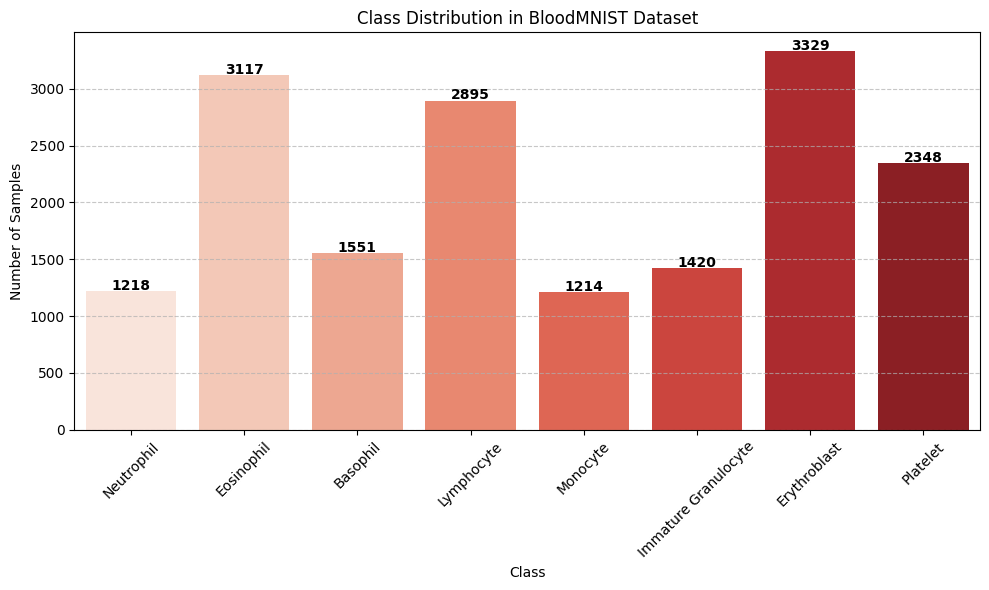

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Visualize class distribution across the full dataset (train + val + test)
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all labels
y_all = np.concatenate([y_train_64, y_val_64, y_test_64]).flatten()

# Count samples per class
class_counts = Counter(y_all)

# Define class label names
class_names = [
    "Neutrophil", "Eosinophil", "Basophil", "Lymphocyte",
    "Monocyte", "Immature Granulocyte", "Erythroblast", "Platelet"
]

# Compute counts and percentages
counts = [class_counts[i] for i in range(len(class_names))]
percentages = [count / sum(counts) * 100 for count in counts]

# Print dataset stats
print(f"Total samples: {sum(counts)}")
print(f"Number of classes: {len(class_names)}")
print("\nSamples per class:")
for name, count, pct in zip(class_names, counts, percentages):
    print(f"{name:<25}: {count:>5} ({pct:.2f}%)")

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=counts, palette="Reds")
plt.title("Class Distribution in BloodMNIST Dataset")
plt.ylabel("Number of Samples")
plt.xlabel("Class")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add % text above each bar
for i, count in enumerate(counts):
    plt.text(i, count + 10, f"{counts[i]}", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()



## Visualize Sample Images

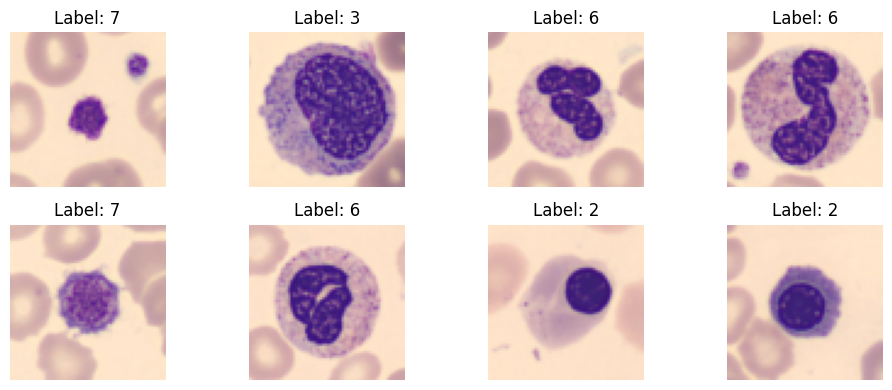

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(X_train_64[i])
    plt.title(f"Label: {y_train_64[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Build and Compile Baseline CNN

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

def build_baseline_cnn(input_shape=(64, 64, 3), num_classes=8):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model_baseline_64 = build_baseline_cnn()
model_baseline_64.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_baseline_64.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,143,880 (4.36 MB)

 Trainable params: 1,143,432 (4.36 MB)

 Non-trainable params: 448 (1.75 KB)

## Train the Model

In [8]:
early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history_baseline_64 = model_baseline_64.fit(
    X_train_64, y_train_64,
    validation_data=(X_val_64, y_val_64),
    epochs=40,
    batch_size=64,
    callbacks=[early_stop]
)

Epoch 1/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.4414 - loss: 2.0604 - val_accuracy: 0.1373 - val_loss: 52.8388
Epoch 2/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7716 - loss: 0.5903 - val_accuracy: 0.1373 - val_loss: 39.5389
Epoch 3/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8313 - loss: 0.4728 - val_accuracy: 0.4036 - val_loss: 7.7073
Epoch 4/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8639 - loss: 0.3768 - val_accuracy: 0.7138 - val_loss: 1.1449
Epoch 5/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8735 - loss: 0.3528 - val_accuracy: 0.6384 - val_loss: 2.4762
Epoch 6/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8997 - loss: 0.2924 - val_accuracy: 0.8557 - val_loss: 0.5459
Epoch 7/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9093 - loss: 0.2881 - val_accuracy: 0.9182 - val_loss: 0.3241
Epoch 8/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9080 - loss: 0.2641 - val_accuracy

## Plot Training History

I am gonna reuse this function for the other models as well!

In [9]:
import matplotlib.pyplot as plt

def plot_training_diagnostics(history, times_per_epoch=None, model_name="Model"):
    epochs = range(1, len(history.history['accuracy']) + 1)

    fig, axs = plt.subplots(1, 3 if times_per_epoch is not None else 2, figsize=(18, 5))

    # Accuracy Plot
    axs[0].plot(epochs, history.history['accuracy'], label='Train Accuracy')
    axs[0].plot(epochs, history.history['val_accuracy'], label='Val Accuracy')
    axs[0].set_title(f'{model_name} Accuracy per Epoch')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()
    axs[0].grid(True)

    # Loss Plot
    axs[1].plot(epochs, history.history['loss'], label='Train Loss')
    axs[1].plot(epochs, history.history['val_loss'], label='Val Loss')
    axs[1].set_title(f'{model_name} Loss per Epoch')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].legend()
    axs[1].grid(True)

    # Optional: Time per Epoch
    if times_per_epoch is not None:
        axs[2].plot(epochs, times_per_epoch, marker='o')
        axs[2].set_title(f'{model_name} Time per Epoch')
        axs[2].set_xlabel('Epoch')
        axs[2].set_ylabel('Time (seconds)')
        axs[2].grid(True)

    plt.tight_layout()
    plt.show()


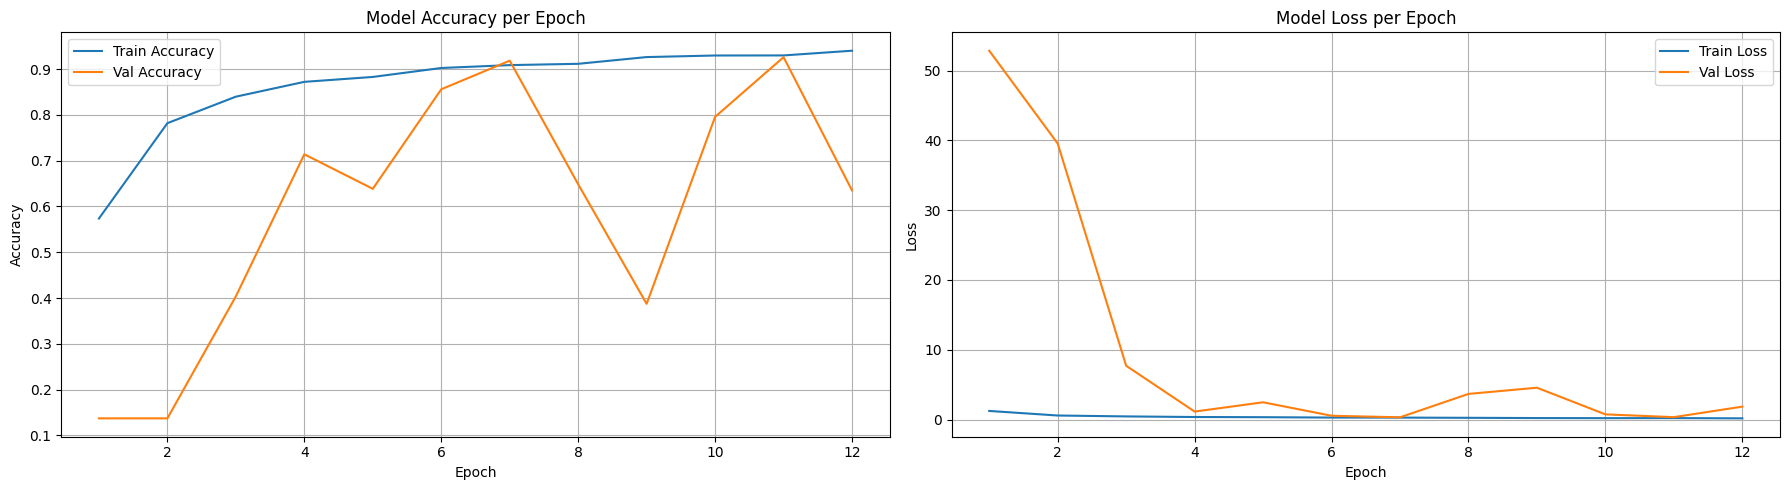

In [10]:
plot_training_diagnostics(history_baseline_64)

## Evaluate the Model on Test Set

In [11]:
test_loss, test_acc = model_baseline_64.evaluate(X_test_64, y_test_64)
print(f"Test Accuracy: {test_acc:.4f}")


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9046 - loss: 0.3745
Test Accuracy: 0.9108


## Confusion Matrix & Classification Report

In [12]:
class_accuracy(model_baseline_64, X_test_64, y_test_64, label_map)

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Accuracy of Basophil: 76.23%
Accuracy of Eosinophil: 99.20%
Accuracy of Erythroblast: 89.39%
Accuracy of Immature granulocytes: 87.05%
Accuracy of Lymphocyte: 74.07%
Accuracy of Monocyte: 77.11%
Accuracy of Neutrophil: 99.10%
Accuracy of Platelet: 100.00%


107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                       precision    recall  f1-score   support

             Basophil       0.96      0.76      0.85       244
           Eosinophil       1.00      0.99      0.99       624
         Erythroblast       0.93      0.89      0.91       311
Immature granulocytes       0.75      0.87      0.81       579
           Lymphocyte       0.99      0.74      0.85       243
             Monocyte       0.93      0.77      0.84       284
           Neutrophil       0.88      0.99      0.93       666
             Platelet       0.99      1.00      0.99       470

             accuracy                           0.91      3421
            macro avg       0.93      0.88      0.90      3421
         weighted avg       0.92      0.91      0.91      3421



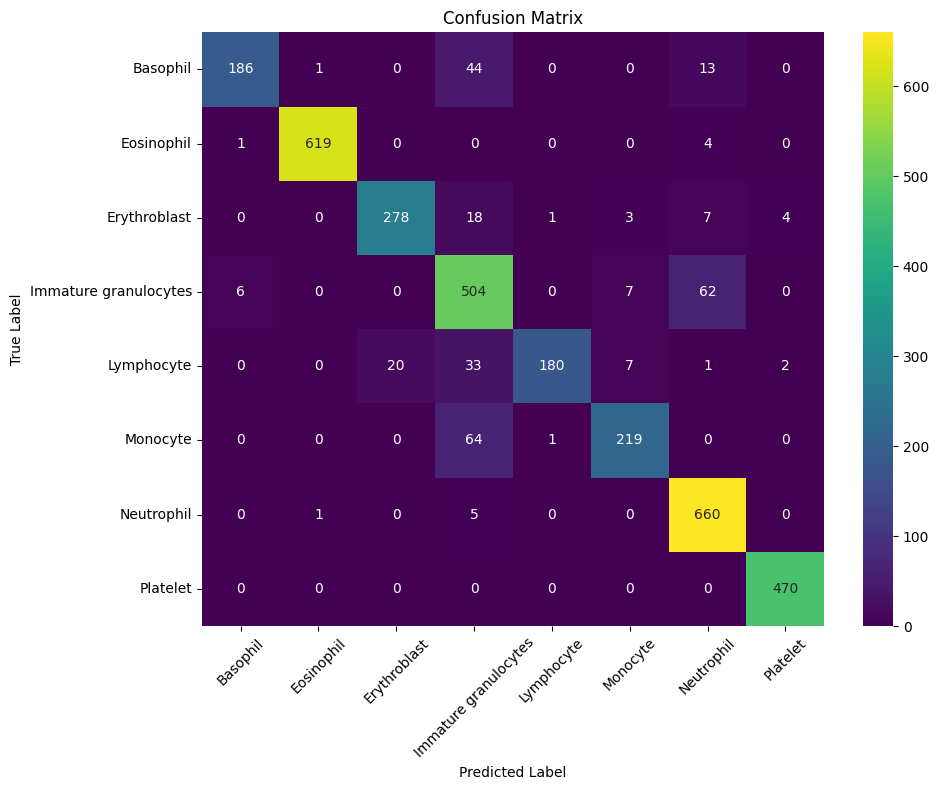

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get predictions
y_pred_baseline_64 = model_baseline_64.predict(X_test_64).argmax(axis=1)
y_true_baseline_64 = y_test_64  # assuming this is label-encoded, not one-hot

# Print classification report with class names
print(classification_report(y_true_baseline_64, y_pred_baseline_64, target_names=list(label_map.values())))

# Confusion matrix with class names
conf_matrix = confusion_matrix(y_true_baseline_64, y_pred_baseline_64)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis",
            xticklabels=list(label_map.values()),
            yticklabels=list(label_map.values()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Class based acc:
* Accuracy of Basophil: **88.52%**
* Accuracy of Eosinophil: **99.20%**
* Accuracy of Erythroblast: **94.21%**
* Accuracy of Immature granulocytes: **87.22%**
* Accuracy of Lymphocyte: **96.30%**
* Accuracy of Monocyte: **96.13%**
* Accuracy of Neutrophil: **92.79%**
* Accuracy of Platelet: **99.79%**

General acc:  0.94


a Convolutional Neural Network (CNN) for image classification with input size (64, 64, 3) and 8 output classes.

Architecture Breakdown

1. Input Layer
* Shape: (64, 64, 3) (RGB image, 64x64 resolution)

2. Block 1:** Conv → BN → MaxPool → Dropout**


> layers.Conv2D(32, (3, 3), activation='relu', padding='same')
>layers.BatchNormalization()
>layers.MaxPooling2D(2, 2)
>layers.Dropout(0.25)

* Conv2D: 32 filters, 3x3 kernel, ReLU → extracts 32 low-level features like edges.

* BatchNormalization: normalizes activations to help training stability.

* MaxPooling2D: reduces spatial size by 2 (from 64×64 → 32×32).

* Dropout: randomly disables 25% of neurons to prevent overfitting.

3. Block 2: ** Conv → BN → MaxPool → Dropout**

>layers.Conv2D(64, (3, 3), activation='relu', padding='same')
>layers.BatchNormalization()
>layers.MaxPooling2D(2, 2)
>layers.Dropout(0.25)

Similar to Block 1 but now with 64 filters.

Output size reduces again: 32×32 → 16×16.

4. Block 3: ** Conv → BN → MaxPool → Dropout**

>layers.Conv2D(128, (3, 3), activation='relu', padding='same')
>layers.BatchNormalization()
>layers.MaxPooling2D(2, 2)
>layers.Dropout(0.3)

128 filters to extract more complex patterns.

Output size: 16×16 → 8×8.

5. Flatten + Fully Connected Layers

>layers.Flatten()
>layers.Dense(128, activation='relu')
>layers.Dropout(0.5)
>Flatten: turns 8×8×128 → 8192 features

* Dense(128): fully connected layer with 128 neurons

* Dropout(0.5): aggressive regularization to prevent overfitting

6. Output Layer

>layers.Dense(num_classes, activation='softmax')

* Final dense layer with 8 neurons, one for each class.

Softmax: outputs class probabilities that sum to 1.

- **Layer Type**	Count
- **Conv2D**	3
- **BatchNormalization**	3
- **MaxPooling2D**	3
- **Dropout**	4
- **Flatten**	1
- **Dense**	2
- **Total (Trainable)**	16



# BASELINE FOR 128

In [14]:
# Download dataset
!wget https://zenodo.org/records/10519652/files/bloodmnist_128.npz?download=1 -O bloodmnist_128.npz

--2025-06-02 21:12:58--  https://zenodo.org/records/10519652/files/bloodmnist_128.npz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.43.25, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569072780 (543M) [application/octet-stream]
Saving to: ‘bloodmnist_128.npz’

bloodmnist_128.npz  100%[===================>] 542.71M  18.8MB/s    in 31s     

2025-06-02 21:13:30 (17.3 MB/s) - ‘bloodmnist_128.npz’ saved [569072780/569072780]



In [15]:
import numpy as np

# Load data
data_128 = np.load("bloodmnist_128.npz")
X_train_128 = data_128['train_images'] / 255.0
X_val_128   = data_128['val_images'] / 255.0
X_test_128  = data_128['test_images'] / 255.0

y_train_128 = data_128['train_labels'].astype(np.int32).flatten()
y_val_128   = data_128['val_labels'].astype(np.int32).flatten()
y_test_128  = data_128['test_labels'].astype(np.int32).flatten()

print(f"Train: {X_train_128.shape}, Val: {X_val_128.shape}, Test: {X_test_128.shape}")


Train: (11959, 128, 128, 3), Val: (1712, 128, 128, 3), Test: (3421, 128, 128, 3)


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_baseline_cnn(input_shape=(128, 128, 3), num_classes=8):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model_baseline_128 = build_baseline_cnn()
model_baseline_128.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_baseline_128.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289,608 (16.36 MB)

 Trainable params: 4,289,160 (16.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history_baseline_128 = model_baseline_128.fit(
    X_train_128, y_train_128,
    validation_data=(X_val_128, y_val_128),
    epochs=40,
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 22s 74ms/step - accuracy: 0.3992 - loss: 3.4711 - val_accuracy: 0.1139 - val_loss: 55.6327
Epoch 2/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.5564 - loss: 1.1038 - val_accuracy: 0.0917 - val_loss: 25.3089
Epoch 3/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.6439 - loss: 0.9485 - val_accuracy: 0.3732 - val_loss: 4.6299
Epoch 4/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.6848 - loss: 0.8598 - val_accuracy: 0.6869 - val_loss: 0.9878
Epoch 5/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.7075 - loss: 0.7971 - val_accuracy: 0.3843 - val_loss: 1.7641
Epoch 6/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.7196 - loss: 0.7696 - val_accuracy: 0.6951 - val_loss: 0.8108
Epoch 7/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.7614 - loss: 0.6608 - val_accuracy: 0.8049 - val_loss: 0.7806
Epoch 8/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.7844 - loss: 0.5945 - val_a

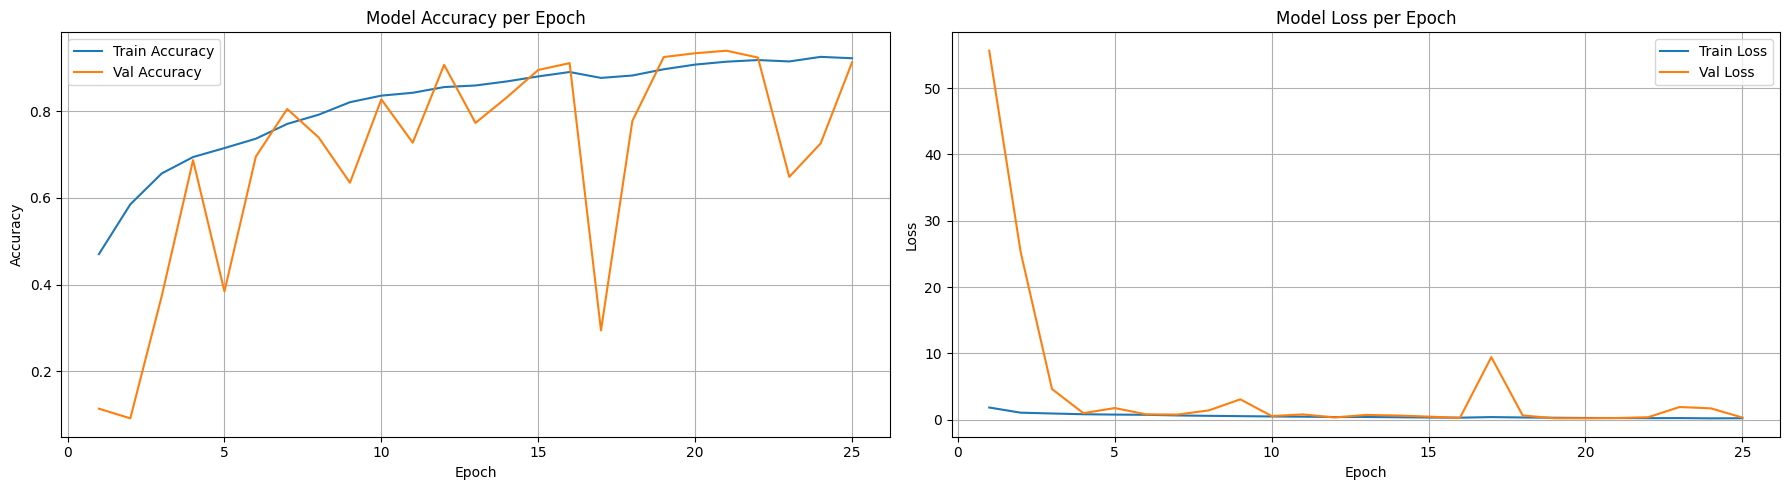

In [18]:
plot_training_diagnostics(history_baseline_128)

In [19]:
test_loss_baseline_128, test_acc_baseline_128 = model_baseline_128.evaluate(X_test_128, y_test_128)
print(f"Test Accuracy: {test_acc_baseline_128:.4f}")


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9110 - loss: 0.2813
Test Accuracy: 0.9205


In [20]:
class_accuracy(model_baseline_128, X_test_128, y_test_128, label_map)

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Accuracy of Basophil: 81.97%
Accuracy of Eosinophil: 100.00%
Accuracy of Erythroblast: 94.53%
Accuracy of Immature granulocytes: 93.78%
Accuracy of Lymphocyte: 96.30%
Accuracy of Monocyte: 71.48%
Accuracy of Neutrophil: 87.24%
Accuracy of Platelet: 100.00%


107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
                       precision    recall  f1-score   support

             Basophil       0.98      0.82      0.89       244
           Eosinophil       1.00      1.00      1.00       624
         Erythroblast       0.97      0.95      0.96       311
Immature granulocytes       0.73      0.94      0.82       579
           Lymphocyte       0.91      0.96      0.93       243
             Monocyte       0.92      0.71      0.81       284
           Neutrophil       0.98      0.87      0.92       666
             Platelet       1.00      1.00      1.00       470

             accuracy                           0.92      3421
            macro avg       0.93      0.91      0.92      3421
         weighted avg       0.93      0.92      0.92      3421



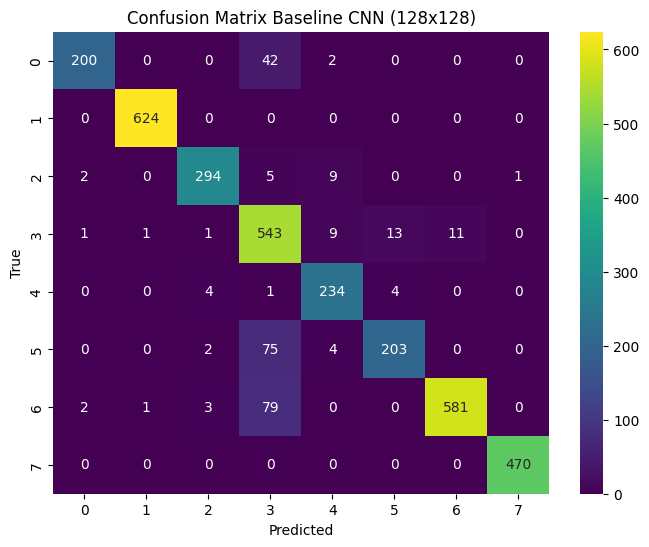

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_baseline_128 = model_baseline_128.predict(X_test_128).argmax(axis=1)
print(classification_report(y_test_128, y_pred_baseline_128, target_names=list(label_map.values())))


conf_matrix_baseline_128 = confusion_matrix(y_test_128, y_pred_baseline_128)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_baseline_128, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix Baseline CNN (128x128)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


with the baseline cnn 95% general accuracy now we gonna improve the cnn architecture a bit and add some additional features to improve the accurcy such as augmentation

Here is how to add data augmentation to your 128×128 baseline CNN model. This version keeps your architecture exactly the same but adds augmentation only during training using ImageDataGenerator.



In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True
)

# Fit generator to training data
#datagen.fit(X_train_128)


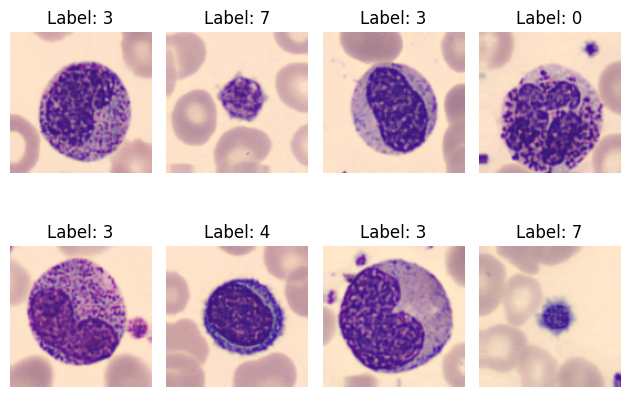

In [23]:
for X_batch, y_batch in datagen.flow(X_train_128, y_train_128, batch_size=8):
    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.imshow(X_batch[i])
        plt.title(f"Label: {y_batch[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    break


In [24]:
from tensorflow.keras import layers, models, callbacks

def build_baseline_cnn(input_shape=(128, 128, 3), num_classes=8):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Instantiate and compile
model_aug = build_baseline_cnn()
model_aug.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_aug.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289,608 (16.36 MB)

 Trainable params: 4,289,160 (16.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [25]:
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history_aug = model_aug.fit(
    datagen.flow(X_train_128, y_train_128, batch_size=64),
    validation_data=(X_val_128, y_val_128),
    epochs=40,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 53s 244ms/step - accuracy: 0.4846 - loss: 2.9682 - val_accuracy: 0.0713 - val_loss: 61.7496
Epoch 2/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 214ms/step - accuracy: 0.6828 - loss: 0.8951 - val_accuracy: 0.2033 - val_loss: 26.1413
Epoch 3/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 214ms/step - accuracy: 0.7238 - loss: 0.7524 - val_accuracy: 0.6822 - val_loss: 1.0816
Epoch 4/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 214ms/step - accuracy: 0.7584 - loss: 0.6612 - val_accuracy: 0.6846 - val_loss: 1.2658
Epoch 5/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 214ms/step - accuracy: 0.7902 - loss: 0.5878 - val_accuracy: 0.8522 - val_loss: 0.4631
Epoch 6/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 214ms/step - accuracy: 0.8180 - loss: 0.4919 - val_accuracy: 0.7617 - val_loss: 0.7716
Epoch 7/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 213ms/step - accuracy: 0.8435 - loss: 0.4367 - val_accuracy: 0.7798 - val_loss: 0.6189
Epoch 8/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 216ms/step - accuracy: 0.8589 - loss:

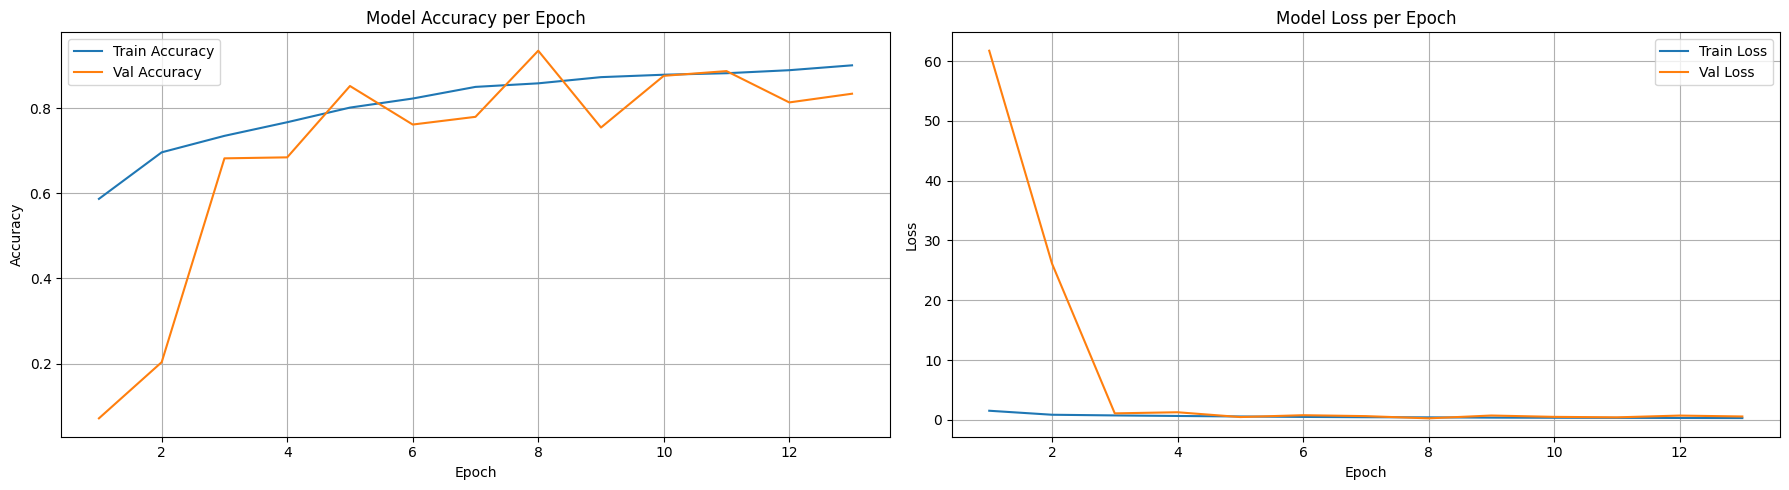

In [26]:
plot_training_diagnostics(history_aug)

In [27]:
test_loss_aug_128, test_acc_aug_128 = model_aug.evaluate(X_test_128, y_test_128)
print(f"Test Accuracy: {test_acc_aug_128:.4f}")

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9177 - loss: 0.2440
Test Accuracy: 0.9246


In [28]:
class_accuracy(model_aug, X_test_128, y_test_128, label_map)

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Accuracy of Basophil: 88.93%
Accuracy of Eosinophil: 97.76%
Accuracy of Erythroblast: 93.57%
Accuracy of Immature granulocytes: 86.70%
Accuracy of Lymphocyte: 96.71%
Accuracy of Monocyte: 86.27%
Accuracy of Neutrophil: 89.04%
Accuracy of Platelet: 100.00%


107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
                       precision    recall  f1-score   support

             Basophil       0.96      0.89      0.93       244
           Eosinophil       1.00      0.98      0.99       624
         Erythroblast       0.94      0.94      0.94       311
Immature granulocytes       0.79      0.87      0.83       579
           Lymphocyte       0.92      0.97      0.94       243
             Monocyte       0.83      0.86      0.84       284
           Neutrophil       0.96      0.89      0.92       666
             Platelet       1.00      1.00      1.00       470

             accuracy                           0.92      3421
            macro avg       0.92      0.92      0.92      3421
         weighted avg       0.93      0.92      0.93      3421



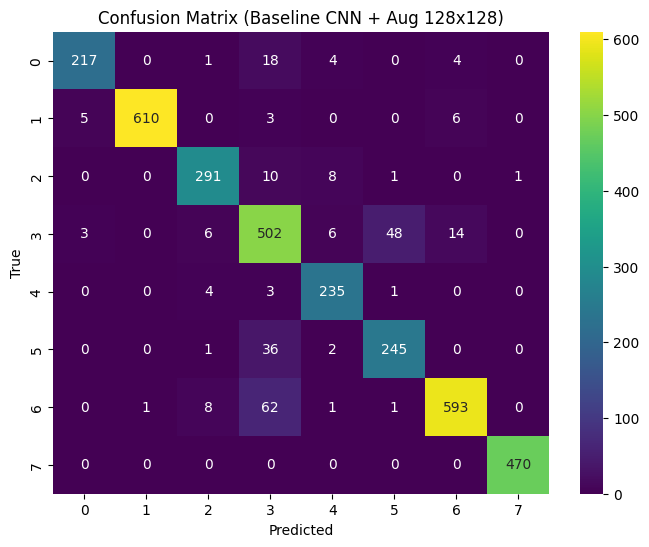

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_aug_128 = model_aug.predict(X_test_128).argmax(axis=1)
print(classification_report(y_test_128, y_pred_aug_128, target_names=list(label_map.values())))

conf_matrix_128 = confusion_matrix(y_test_128, y_pred_aug_128)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_128, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix (Baseline CNN + Aug 128x128)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


We experimented extensively with the 128×128 dataset and found it provided a strong balance of performance and computational efficiency, achieving up to 92% accuracy. Due to diminishing returns and resource constraints, we did not upscale to 256×256.

# Augmented Training with Simplified U-Net-Inspired CNN

In [69]:
# Step 2: Define a Simple U-Net-Inspired CNN
from tensorflow.keras import layers, models

from tensorflow.keras import layers, models

def build_simplified_unet_encoder(input_shape=(128, 128, 3), num_classes=8):
    model = models.Sequential([
        # Block 1
        layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),
        layers.Dropout(0.1),

        # Block 2
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),
        layers.Dropout(0.15),

        # Block 3
        layers.Conv2D(128, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),
        layers.Dropout(0.2),

        # Classification Head
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [70]:
# Step 3: Compile and Train
from tensorflow.keras import callbacks
from sklearn.utils.class_weight import compute_class_weight

model_simplified = build_simplified_unet_encoder()
model_simplified.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_128), y=y_train_128)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

lr_schedule = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)



# Callbacks
early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Train with augmentation
history_simplified = model_simplified.fit(
    datagen.flow(X_train_128, y_train_128, batch_size=64),
    validation_data=(X_val_128, y_val_128),
    epochs=40,
    callbacks=[early_stop, lr_schedule],
    class_weight=class_weights_dict
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 51s 238ms/step - accuracy: 0.3273 - loss: 2.8091 - val_accuracy: 0.1373 - val_loss: 83.9581 - learning_rate: 0.0010
Epoch 2/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 214ms/step - accuracy: 0.4171 - loss: 1.5049 - val_accuracy: 0.0905 - val_loss: 42.2734 - learning_rate: 0.0010
Epoch 3/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 216ms/step - accuracy: 0.5765 - loss: 1.2115 - val_accuracy: 0.2173 - val_loss: 29.7586 - learning_rate: 0.0010
Epoch 4/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 214ms/step - accuracy: 0.6920 - loss: 0.9487 - val_accuracy: 0.3481 - val_loss: 3.1572 - learning_rate: 0.0010
Epoch 5/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 212ms/step - accuracy: 0.7123 - loss: 0.8411 - val_accuracy: 0.6279 - val_loss: 1.0855 - learning_rate: 0.0010
Epoch 6/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 213ms/step - accuracy: 0.7212 - loss: 0.7386 - val_accuracy: 0.6180 - val_loss: 0.9226 - learning_rate: 0.0010
Epoch 7/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 215ms/step - accuracy: 

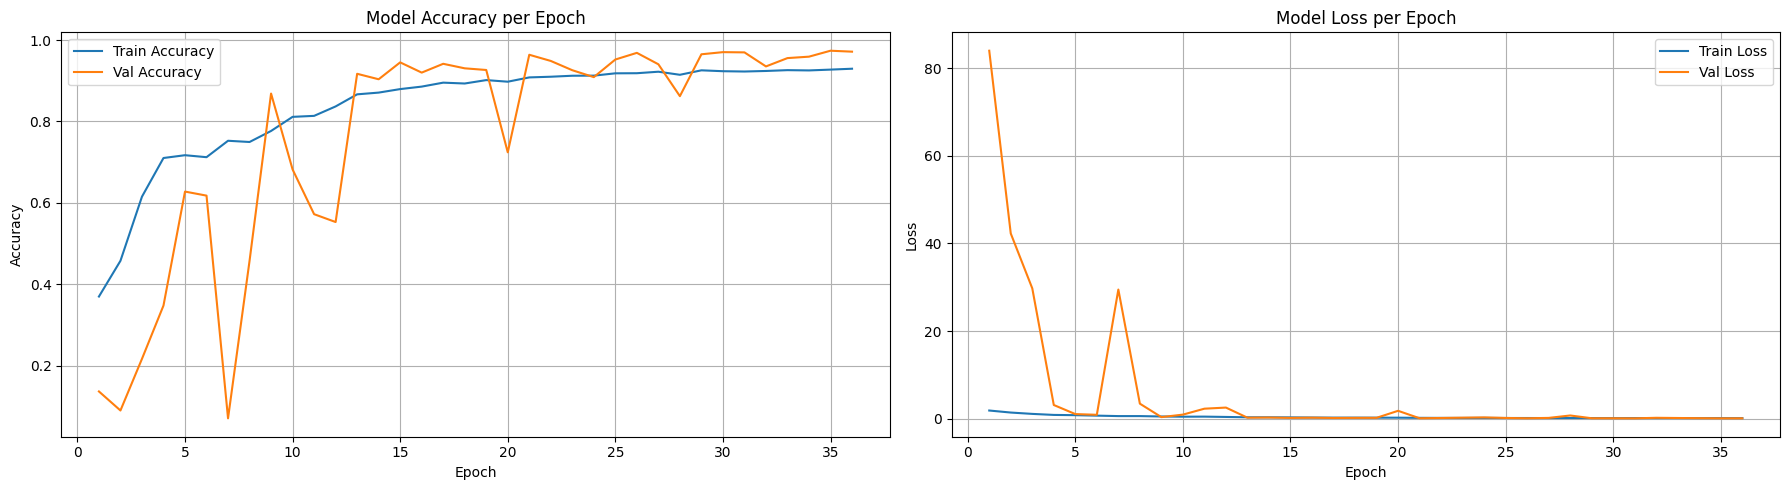

In [71]:
plot_training_diagnostics(history_simplified)


In [72]:
# Step 4: Evaluate + Plot Results
test_loss_simplified, test_acc_simplified = model_simplified.evaluate(X_test_128, y_test_128)
print(f"Test Accuracy: {test_acc_simplified:.4f}")

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9625 - loss: 0.1514
Test Accuracy: 0.9664


In [73]:
class_accuracy(model_simplified, X_test_128, y_test_128, label_map)

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Accuracy of Basophil: 97.95%
Accuracy of Eosinophil: 99.68%
Accuracy of Erythroblast: 96.46%
Accuracy of Immature granulocytes: 89.12%
Accuracy of Lymphocyte: 98.77%
Accuracy of Monocyte: 97.54%
Accuracy of Neutrophil: 96.40%
Accuracy of Platelet: 100.00%


107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report:
                       precision    recall  f1-score   support

             Basophil       0.98      0.98      0.98       244
           Eosinophil       1.00      1.00      1.00       624
         Erythroblast       1.00      0.96      0.98       311
Immature granulocytes       0.94      0.89      0.91       579
           Lymphocyte       0.96      0.99      0.98       243
             Monocyte       0.88      0.98      0.93       284
           Neutrophil       0.96      0.96      0.96       666
             Platelet       0.99      1.00      1.00       470

             accuracy                           0.97      3421
            macro avg       0.96      0.97      0.97      3421
         weighted avg       0.97      0.97      0.97      3421



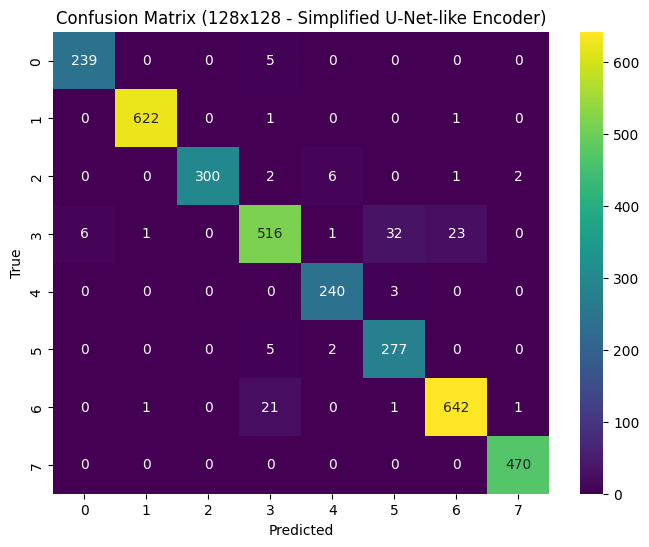

In [74]:
# Step 5: Report & Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_simplied = model_simplified.predict(X_test_128).argmax(axis=1)

print("\nClassification Report:")
print(classification_report(y_test_128, y_pred_simplied,target_names=list(label_map.values())))

conf_matrix = confusion_matrix(y_test_128, y_pred_simplied)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix (128x128 - Simplified U-Net-like Encoder)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


inception block

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight


# Inception Block
def inception_block(x, filters):
    f1, f3_in, f3_out, f5_in, f5_out, proj = filters

    path1 = layers.Conv2D(f1, (1, 1), padding='same', activation='relu')(x)
    path1 = layers.BatchNormalization()(path1)

    path2 = layers.Conv2D(f3_in, (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(f3_out, (3, 3), padding='same', activation='relu')(path2)
    path2 = layers.BatchNormalization()(path2)

    path3 = layers.Conv2D(f5_in, (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(f5_out, (5, 5), padding='same', activation='relu')(path3)
    path3 = layers.BatchNormalization()(path3)

    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(proj, (1, 1), padding='same', activation='relu')(path4)
    path4 = layers.BatchNormalization()(path4)

    return layers.concatenate([path1, path2, path3, path4], axis=-1)

# Build Inception Model
def build_inception_cnn(input_shape=(128, 128, 3), num_classes=8):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D(2)(x)

    x = inception_block(x, [16, 16, 24, 4, 8, 8])
    x = layers.MaxPooling2D(2)(x)

    x = inception_block(x, [32, 32, 48, 8, 16, 16])
    x = layers.MaxPooling2D(2)(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

In [37]:
# Compile and Train
model_inception = build_inception_cnn()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
model_inception.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)


history_inception = model_inception.fit(
    X_train_128, y_train_128,
    validation_data=(X_val_128, y_val_128),
    epochs=40,
    batch_size=64,
    callbacks=[early_stop, lr_scheduler]
)


Epoch 1/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 35s 102ms/step - accuracy: 0.3751 - loss: 1.7839 - val_accuracy: 0.0713 - val_loss: 2.0907 - learning_rate: 1.0000e-04
Epoch 2/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.7194 - loss: 0.9340 - val_accuracy: 0.1443 - val_loss: 2.0276 - learning_rate: 1.0000e-04
Epoch 3/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8107 - loss: 0.6533 - val_accuracy: 0.7839 - val_loss: 1.2601 - learning_rate: 1.0000e-04
Epoch 4/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8520 - loss: 0.5210 - val_accuracy: 0.9065 - val_loss: 0.4768 - learning_rate: 1.0000e-04
Epoch 5/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8722 - loss: 0.4381 - val_accuracy: 0.8978 - val_loss: 0.3542 - learning_rate: 1.0000e-04
Epoch 6/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8944 - loss: 0.3722 - val_accuracy: 0.9206 - val_loss: 0.2906 - learning_rate: 1.0000e-04
Epoch 7/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - a

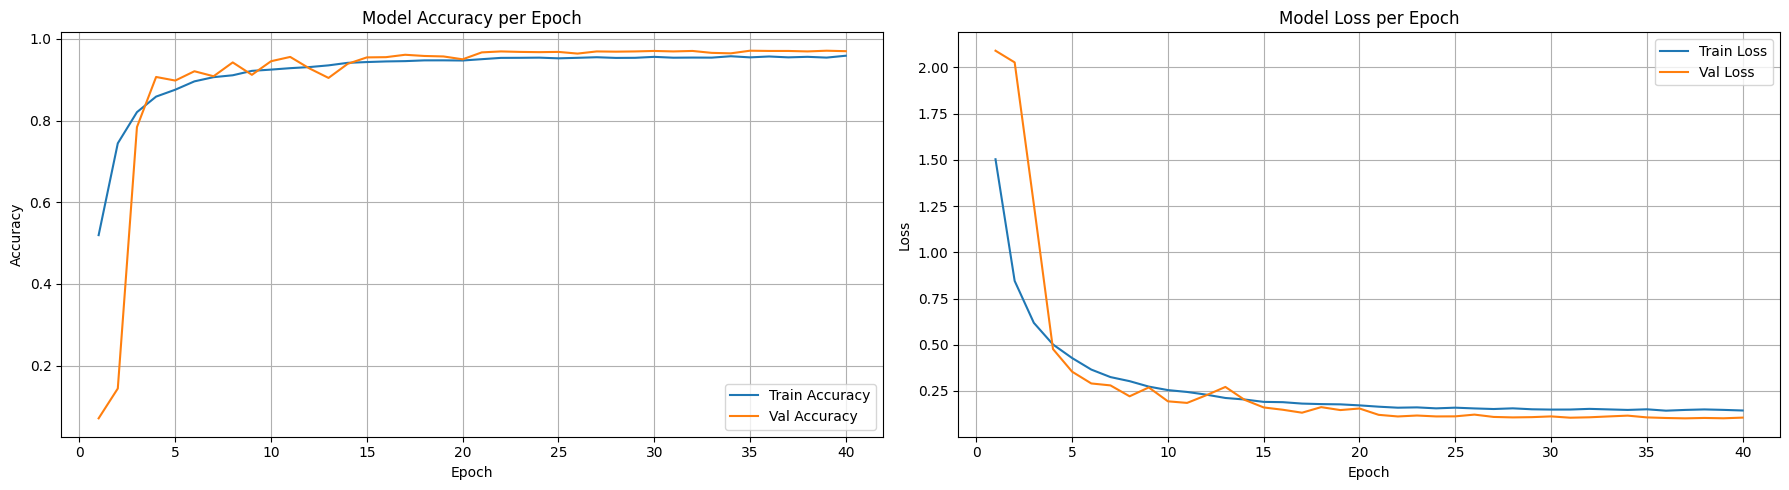

In [38]:
plot_training_diagnostics(history_inception)

In [39]:
# Evaluate
test_loss_inception, test_acc_inception = model_inception.evaluate(X_test_128, y_test_128)
print(f"\n Test Accuracy: {test_acc_inception:.4f}")

107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9672 - loss: 0.1071

 Test Accuracy: 0.9687


In [40]:
class_accuracy(model_inception, X_test_128, y_test_128, label_map)

107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
Accuracy of Basophil: 97.13%
Accuracy of Eosinophil: 100.00%
Accuracy of Erythroblast: 97.75%
Accuracy of Immature granulocytes: 92.06%
Accuracy of Lymphocyte: 99.59%
Accuracy of Monocyte: 92.96%
Accuracy of Neutrophil: 96.10%
Accuracy of Platelet: 100.00%


107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
                       precision    recall  f1-score   support

             Basophil       0.96      0.97      0.97       244
           Eosinophil       1.00      1.00      1.00       624
         Erythroblast       0.99      0.98      0.98       311
Immature granulocytes       0.92      0.92      0.92       579
           Lymphocyte       0.98      1.00      0.99       243
             Monocyte       0.97      0.93      0.95       284
           Neutrophil       0.95      0.96      0.96       666
             Platelet       1.00      1.00      1.00       470

             accuracy                           0.97      3421
            macro avg       0.97      0.97      0.97      3421
         weighted avg       0.97      0.97      0.97      3421



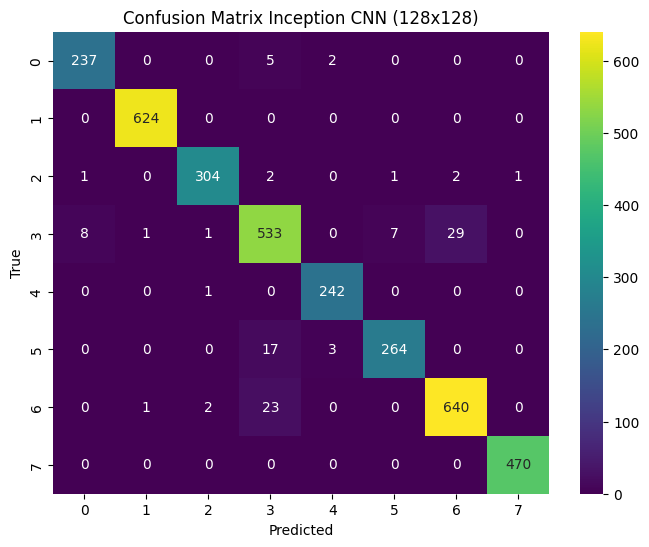

In [41]:
# Classification Report & Confusion Matrix
y_pred_incepiton = model_inception.predict(X_test_128).argmax(axis=1)
print(classification_report(y_test_128, y_pred_incepiton,target_names=list(label_map.values())))

conf_matrix = confusion_matrix(y_test_128, y_pred_incepiton)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix Inception CNN (128x128)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Skip connection

In [42]:
def build_skip_connection_cnn(input_shape=(128, 128, 3), num_classes=8):
    inputs = layers.Input(shape=input_shape)

    x1 = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Conv2D(32, 3, padding='same', activation='relu')(x1)
    x1 = layers.BatchNormalization()(x1)
    p1 = layers.MaxPooling2D(2)(x1)  # (64, 64, 32)

    x2 = layers.Conv2D(64, 3, padding='same', activation='relu')(p1)
    x2 = layers.BatchNormalization()(x2)
    x2 = layers.Conv2D(64, 3, padding='same', activation='relu')(x2)
    x2 = layers.BatchNormalization()(x2)

    # Match p1's channels to x2's using a 1x1 Conv2D
    p1_proj = layers.Conv2D(64, (1, 1), padding='same')(p1)
    skip1 = layers.add([p1_proj, x2])
    p2 = layers.MaxPooling2D(2)(skip1)  # (32, 32, 64)

    x3 = layers.Conv2D(128, 3, padding='same', activation='relu')(p2)
    x3 = layers.BatchNormalization()(x3)
    x3 = layers.Conv2D(128, 3, padding='same', activation='relu')(x3)
    x3 = layers.BatchNormalization()(x3)

    # Match p2's channels to x3's
    p2_proj = layers.Conv2D(128, (1, 1), padding='same')(p2)
    skip2 = layers.add([p2_proj, x3])

    x = layers.GlobalAveragePooling2D()(skip2)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model


In [43]:
from tensorflow.keras import optimizers

model_skip = build_skip_connection_cnn()
optimizer = optimizers.Adam(learning_rate=1e-4)
model_skip.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_128), y=y_train_128)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Train
history_skip = model_skip.fit(
    X_train_128, y_train_128,
    validation_data=(X_val_128, y_val_128),
    epochs=40,
    batch_size=64,
    callbacks=[early_stop, lr_scheduler],
    class_weight=class_weights_dict
)


Epoch 1/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 39s 133ms/step - accuracy: 0.5640 - loss: 1.2666 - val_accuracy: 0.1373 - val_loss: 4.1453 - learning_rate: 1.0000e-04
Epoch 2/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.8631 - loss: 0.4408 - val_accuracy: 0.1297 - val_loss: 4.2213 - learning_rate: 1.0000e-04
Epoch 3/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.9012 - loss: 0.3150 - val_accuracy: 0.4901 - val_loss: 1.5446 - learning_rate: 1.0000e-04
Epoch 4/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.9222 - loss: 0.2514 - val_accuracy: 0.6881 - val_loss: 0.8325 - learning_rate: 1.0000e-04
Epoch 5/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.9369 - loss: 0.2124 - val_accuracy: 0.9188 - val_loss: 0.2505 - learning_rate: 1.0000e-04
Epoch 6/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.9399 - loss: 0.1927 - val_accuracy: 0.9357 - val_loss: 0.1924 - learning_rate: 1.0000e-04
Epoch 7/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/st

In [44]:
# Accuracy and loss
test_loss_skip, test_acc_skip = model_skip.evaluate(X_test_128, y_test_128)
print(f"Test Accuracy: {test_acc_skip:.4f}")


107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9843 - loss: 0.0520
Test Accuracy: 0.9833


In [45]:
class_accuracy(model_skip, X_test_128, y_test_128, label_map)

107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Accuracy of Basophil: 99.18%
Accuracy of Eosinophil: 99.84%
Accuracy of Erythroblast: 99.04%
Accuracy of Immature granulocytes: 95.85%
Accuracy of Lymphocyte: 100.00%
Accuracy of Monocyte: 97.18%
Accuracy of Neutrophil: 97.15%
Accuracy of Platelet: 100.00%


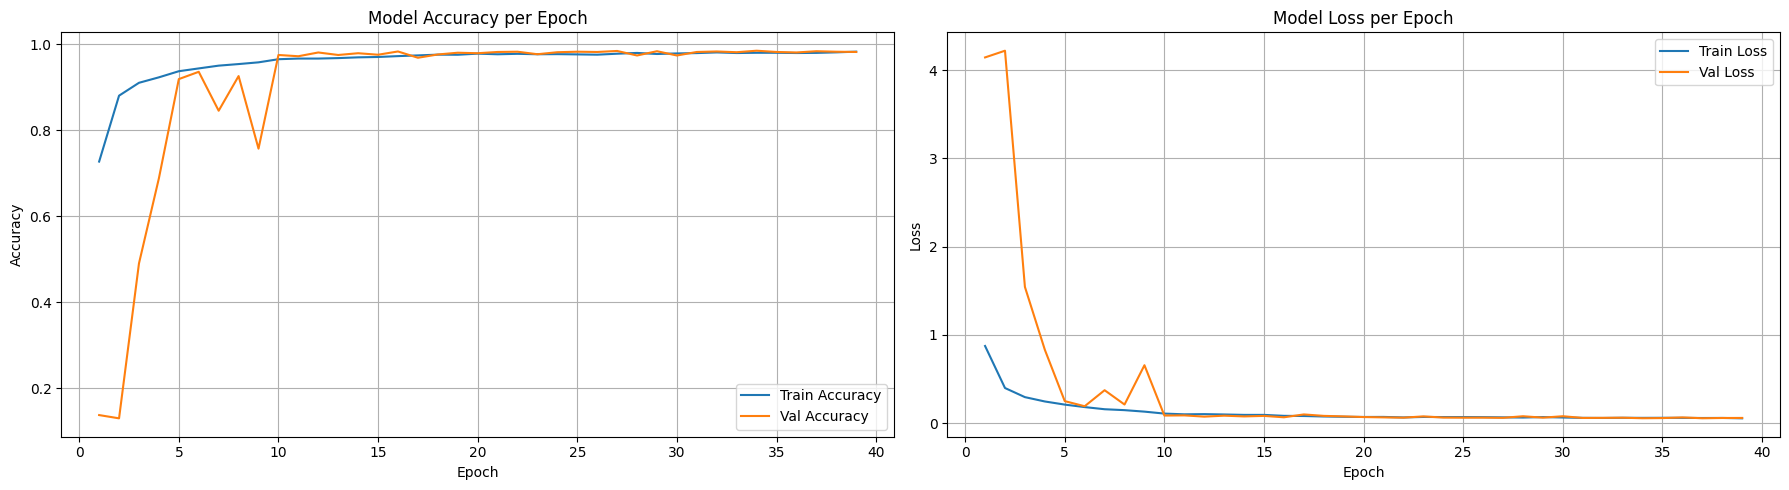

In [46]:
plot_training_diagnostics(history_skip)

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

Classification Report:
                       precision    recall  f1-score   support

             Basophil       0.99      0.99      0.99       244
           Eosinophil       1.00      1.00      1.00       624
         Erythroblast       1.00      0.99      1.00       311
Immature granulocytes       0.95      0.96      0.96       579
           Lymphocyte       0.99      1.00      0.99       243
             Monocyte       0.99      0.97      0.98       284
           Neutrophil       0.97      0.97      0.97       666
             Platelet       1.00      1.00      1.00       470

             accuracy                           0.98      3421
            macro avg       0.99      0.99      0.99      3421
         weighted avg       0.98      0.98      0.98      3421



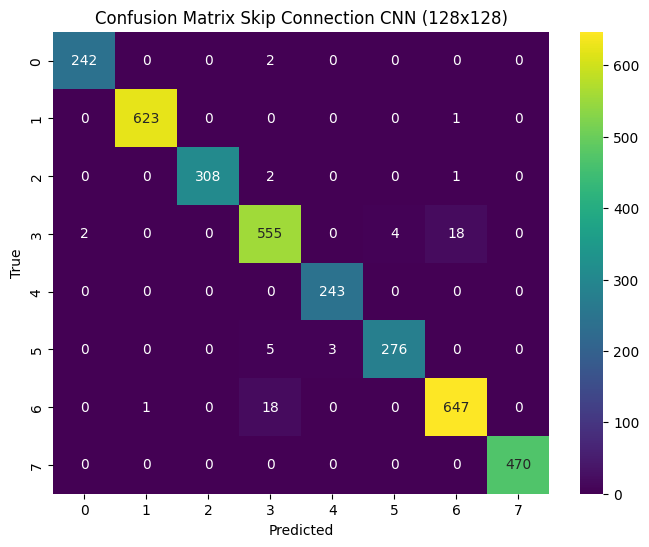

In [47]:
# Classification report
y_pred_skip = model_skip.predict(X_test_128).argmax(axis=1)
print("\nClassification Report:")
print(classification_report(y_test_128, y_pred_skip,target_names=list(label_map.values())))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_128, y_pred_skip)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix Skip Connection CNN (128x128)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Hybrid Architecture (Inception + Skip Connections)


In [48]:
from tensorflow.keras import layers, models, Input

# Define Inception Block with BatchNorm
def inception_block(x, filters):
    f1, f3_in, f3_out, f5_in, f5_out, proj = filters

    path1 = layers.Conv2D(f1, 1, padding='same', activation='relu')(x)
    path1 = layers.BatchNormalization()(path1)

    path2 = layers.Conv2D(f3_in, 1, padding='same', activation='relu')(x)
    path2 = layers.Conv2D(f3_out, 3, padding='same', activation='relu')(path2)
    path2 = layers.BatchNormalization()(path2)

    path3 = layers.Conv2D(f5_in, 1, padding='same', activation='relu')(x)
    path3 = layers.Conv2D(f5_out, 5, padding='same', activation='relu')(path3)
    path3 = layers.BatchNormalization()(path3)

    path4 = layers.MaxPooling2D(pool_size=3, strides=1, padding='same')(x)
    path4 = layers.Conv2D(proj, 1, padding='same', activation='relu')(path4)
    path4 = layers.BatchNormalization()(path4)

    return layers.concatenate([path1, path2, path3, path4], axis=-1)

# Build Full Model
def build_inception_skip_cnn(input_shape=(128, 128, 3), num_classes=8):
    inputs = Input(shape=input_shape)

    x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2)(x)

    # Inception Block 1 + Skip
    inception1 = inception_block(x, [16, 16, 24, 4, 8, 8])
    skip1 = layers.Conv2D(inception1.shape[-1], 1, padding='same')(x)
    x = layers.add([inception1, skip1])
    x = layers.MaxPooling2D(2)(x)

    # Inception Block 2 + Skip
    inception2 = inception_block(x, [32, 32, 48, 8, 16, 16])
    skip2 = layers.Conv2D(inception2.shape[-1], 1, padding='same')(x)
    x = layers.add([inception2, skip2])
    x = layers.MaxPooling2D(2)(x)

    # Output Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)


This model includes:

Two Inception blocks with batch normalization,

Skip connections added via 1x1 convolutions for dimensional alignment,

GlobalAveragePooling and a classification head.



In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras import callbacks, optimizers


Build & Compile the Model



In [50]:
model_skip_inception = build_inception_skip_cnn()

optimizer = optimizers.Adam(learning_rate=1e-4)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

model_skip_inception.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model_skip_inception.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 128, 128,  │        896 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_33[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_19    │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 64, 64,    │        528 │ max_pooling2d_19… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 64, 64, 4) │        132 │ max_pooling2d_19… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_20    │ (None, 64, 64,    │          0 │ max_pooling2d_19… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 64, 64,    │        528 │ max_pooling2d_19… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 64, 64,    │      3,480 │ conv2d_35[0][0]   │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 64, 64, 8) │        808 │ conv2d_37[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 64, 64, 8) │        264 │ max_pooling2d_20… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │         64 │ conv2d_34[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │         96 │ conv2d_36[0][0]   │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64, 8) │         32 │ conv2d_38[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64, 8) │         32 │ conv2d_39[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Concatenate)       │ 56)               │            │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 64, 64,    │      1,848 │ max_pooling2d_19… │
│                     │ 56)               │            │                 

 Total params: 45,524 (177.83 KB)

 Trainable params: 45,124 (176.27 KB)

 Non-trainable params: 400 (1.56 KB)

Prepare Class Weights & Callbacks



In [51]:
# Class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_128), y=y_train_128)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Callbacks
early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)


Train the Model

In [52]:
history_skip_inception = model_skip_inception.fit(
    X_train_128, y_train_128,
    validation_data=(X_val_128, y_val_128),
    epochs=40,
    batch_size=64,
    callbacks=[early_stop, lr_scheduler],
    class_weight=class_weights_dict
)


Epoch 1/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step - accuracy: 0.3290 - loss: 1.7900 - val_accuracy: 0.1530 - val_loss: 2.1749 - learning_rate: 1.0000e-04
Epoch 2/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.6919 - loss: 1.0045 - val_accuracy: 0.1466 - val_loss: 2.1806 - learning_rate: 1.0000e-04
Epoch 3/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.7902 - loss: 0.7059 - val_accuracy: 0.4381 - val_loss: 1.3994 - learning_rate: 1.0000e-04
Epoch 4/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8461 - loss: 0.5244 - val_accuracy: 0.8727 - val_loss: 0.5221 - learning_rate: 1.0000e-04
Epoch 5/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8742 - loss: 0.4313 - val_accuracy: 0.8925 - val_loss: 0.3578 - learning_rate: 1.0000e-04
Epoch 6/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8879 - loss: 0.3669 - val_accuracy: 0.9287 - val_loss: 0.2717 - learning_rate: 1.0000e-04
Epoch 7/40
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - ac

Plot Training Curves

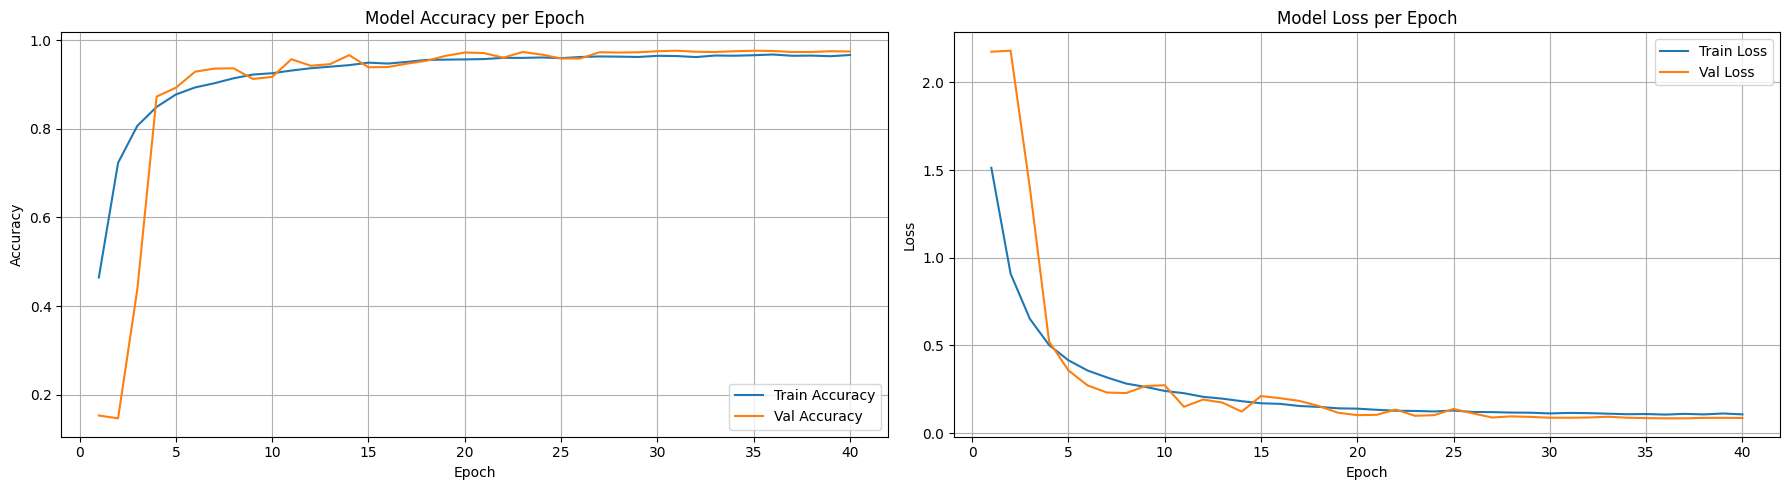

In [53]:
plot_training_diagnostics(history_skip_inception)


Class based accuracy

In [54]:
class_accuracy(model_skip_inception, X_test_128, y_test_128, label_map)

107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
Accuracy of Basophil: 99.18%
Accuracy of Eosinophil: 100.00%
Accuracy of Erythroblast: 98.39%
Accuracy of Immature granulocytes: 92.92%
Accuracy of Lymphocyte: 99.59%
Accuracy of Monocyte: 97.89%
Accuracy of Neutrophil: 95.20%
Accuracy of Platelet: 100.00%


Evaluate on Test Set

In [55]:
test_loss_skip_inception, test_acc_skip_inception = model_skip_inception.evaluate(X_test_128, y_test_128)
print(f"\n Test Accuracy: {test_acc_skip_inception:.4f}")


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9728 - loss: 0.0873

 Test Accuracy: 0.9746


Classification Report & Confusion Matrix

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Classification Report:
                       precision    recall  f1-score   support

             Basophil       0.98      0.99      0.98       244
           Eosinophil       0.99      1.00      1.00       624
         Erythroblast       0.99      0.98      0.99       311
Immature granulocytes       0.94      0.93      0.93       579
           Lymphocyte       1.00      1.00      1.00       243
             Monocyte       0.98      0.98      0.98       284
           Neutrophil       0.96      0.95      0.95       666
             Platelet       1.00      1.00      1.00       470

             accuracy                           0.97      3421
            macro avg       0.98      0.98      0.98      3421
         weighted avg       0.97      0.97      0.97      3421



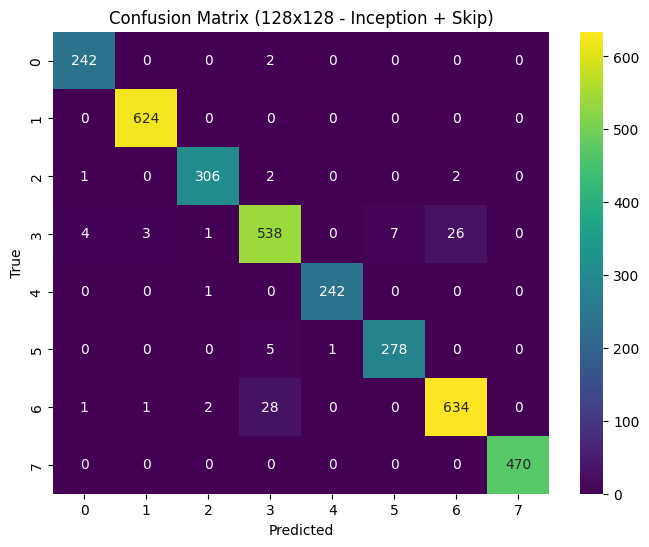

In [56]:
y_pred_skip_inception = model_skip_inception.predict(X_test_128).argmax(axis=1)

print("\nClassification Report:")
print(classification_report(y_test_128, y_pred_skip_inception,target_names=list(label_map.values())))

conf_matrix = confusion_matrix(y_test_128, y_pred_skip_inception)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix (128x128 - Inception + Skip)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [75]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# This function assumes access to a dictionary where each key is model name and values are (history, test accuracy, y_true, y_pred)
def compare_model_performance(model_metrics_dict):
    # Accuracy and Loss plots
    plt.figure(figsize=(14, 5))

    for name, metrics in model_metrics_dict.items():
        history = metrics['history']
        plt.subplot(1, 2, 1)
        plt.plot(history['val_accuracy'], label=f'{name}')
        plt.subplot(1, 2, 2)
        plt.plot(history['val_loss'], label=f'{name}')

    plt.subplot(1, 2, 1)
    plt.title("Validation Accuracy Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title("Validation Loss Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Bar Plot of Final Test Accuracies
    plt.figure(figsize=(8, 5))
    test_accs = {name: metrics['test_acc'] for name, metrics in model_metrics_dict.items()}
    plt.bar(test_accs.keys(), test_accs.values())
    plt.ylabel("Test Accuracy")
    plt.title("Final Test Accuracies by Model")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Class-level accuracy plot
def plot_class_accuracy(y_true, y_pred, class_labels, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    per_class_acc = cm.diagonal() / cm.sum(axis=1)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=class_labels, y=per_class_acc)
    plt.title(f"Class-wise Accuracy: {model_name}")
    plt.ylim(0, 1)
    plt.ylabel("Accuracy")
    plt.xlabel("Class")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return per_class_acc



In [76]:
model_metrics_dict = {
    "Baseline CNN": {
        "history": history_baseline_128,
        "test_acc": test_acc_baseline_128,
        "y_true": y_test_128,
        "y_pred": y_pred_baseline_128
    },
    "Baseline CNN + Aug": {
        "history": history_aug,
        "test_acc": test_acc_aug_128,  # Augmented version's test_acc
        "y_true": y_test_128,
        "y_pred": y_pred_aug_128
    },
    "Simplified U-Net": {
        "history": history_simplified,
        "test_acc": test_acc_simplified,
        "y_true": y_test_128,
        "y_pred": y_pred_simplied
    },
    "Inception CNN": {
        "history": history_inception,
        "test_acc": test_acc_inception,
        "y_true": y_test_128,
        "y_pred": y_pred_incepiton
    },
    "Skip Connection CNN": {
        "history": history_skip,
        "test_acc": test_acc_skip,
        "y_true": y_test_128,
        "y_pred": y_pred_skip
    },
    "Inception + Skip CNN": {
        "history": history_skip_inception,
        "test_acc": test_acc_skip_inception,
        "y_true": y_test_128,
        "y_pred": y_pred_skip_inception
    }
}


In [145]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

def plot_validation_curves(metrics_dict):
    plt.figure(figsize=(16, 6))

    # Accuracy comparison
    plt.subplot(1, 2, 1)
    for name, metrics in metrics_dict.items():
        plt.plot(metrics['history'].history['val_accuracy'], label=name)
    plt.title("Validation Accuracy per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss comparison
    plt.subplot(1, 2, 2)
    for name, metrics in metrics_dict.items():
        plt.plot(metrics['history'].history['val_loss'], label=name)
    plt.title("Validation Loss per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()


import matplotlib.pyplot as plt

def plot_test_accuracy_bars(metrics_dict):
    model_names = list(metrics_dict.keys())
    test_accuracies = [metrics_dict[name]["test_acc"] for name in model_names]

    plt.figure(figsize=(12, 6))
    bars = plt.bar(model_names, test_accuracies, color='darkred', edgecolor='black')

    # Add accuracy labels on top of each bar
    for bar, acc in zip(bars, test_accuracies):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.005,
                 f"{acc:.2%}", ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)
    plt.ylabel("Test Accuracy", fontsize=12)
    plt.title("Model Test Accuracy Comparison", fontsize=14, fontweight='bold')
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

def plot_classwise_accuracy_bar(metrics_dict, class_names):
    num_classes = len(class_names)
    num_models = len(metrics_dict)
    bar_width = 0.12
    index = np.arange(num_classes)

    plt.figure(figsize=(16, 6))

    # Use a colormap (e.g., 'coolwarm') for model coloring
    colors = cm.get_cmap('coolwarm', num_models)

    for i, (model_name, metrics) in enumerate(metrics_dict.items()):
        y_true = np.array(metrics["y_true"])
        y_pred = np.array(metrics["y_pred"])
        class_acc = []

        for j in range(num_classes):
            idx = np.where(y_true == j)[0]
            acc = accuracy_score(y_true[idx], y_pred[idx]) if len(idx) > 0 else np.nan
            class_acc.append(acc)

        # Offset each model’s bars
        plt.bar(index + i * bar_width, class_acc, width=bar_width, label=model_name, color=colors(i))

    plt.xticks(index + bar_width * (num_models - 1) / 2, class_names, rotation=45)
    plt.ylabel("Accuracy")
    plt.title("Class-wise Accuracy per Model (Vertical Bar Chart)")
    plt.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, -0.6),
        ncol=3,
        fontsize='medium'
    )
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

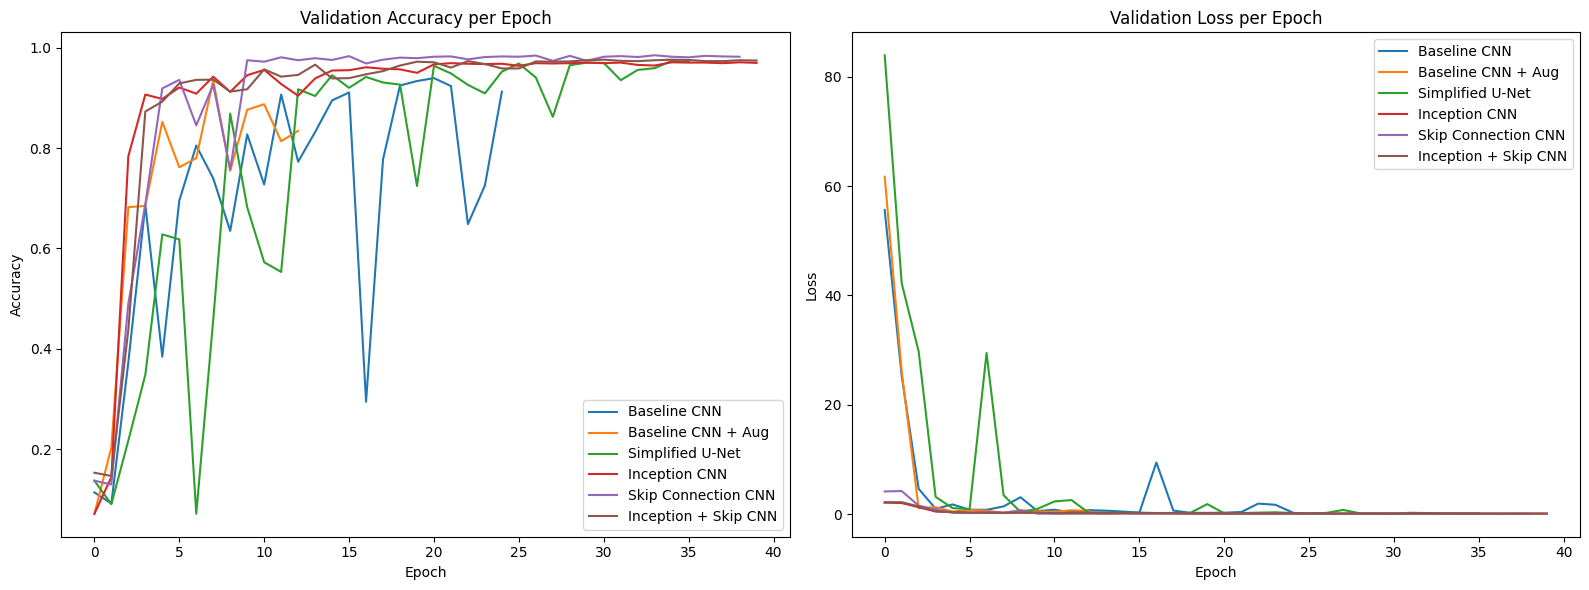

In [146]:
plot_validation_curves(model_metrics_dict)

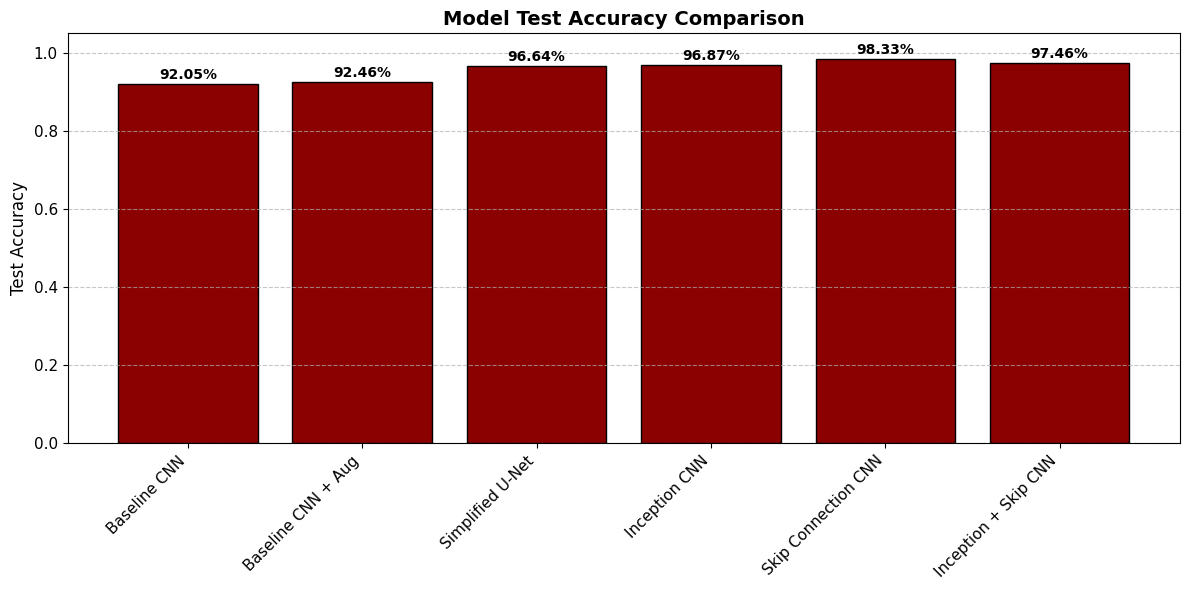

In [147]:
plot_test_accuracy_bars(model_metrics_dict)

<ipython-input-145-c14bdadd2033>:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('coolwarm', num_models)


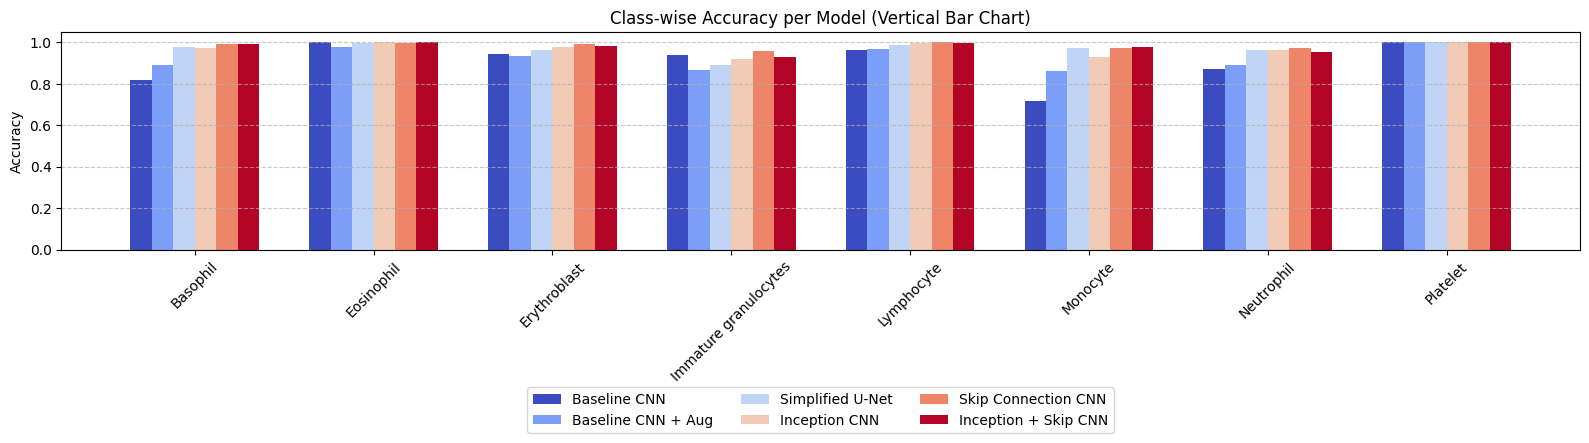

In [148]:
plot_classwise_accuracy_bar(model_metrics_dict, list(label_map.values()))